# Puneethkrishna_DSFT8_MINI_PROJECT_1

## &#10148;Problem Statement </br> 
### <div class="alert alert-info">To help store owner by predicting the future sales by analyzing the past data. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract  customers and set realistic goals.</div>

## &#10148; Requried Libraries</br>

In [1]:
import pandas as pd                                                # Working with dataframe and series
import numpy as np                                                 # Working with numpy arrays
import matplotlib.pyplot as plt                                    # Visualization library
import seaborn as sns                                              # Visualization library
from sklearn.preprocessing import LabelEncoder                     # For converting cat to num
import warnings
warnings.filterwarnings('ignore')                                  # To avoide the warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler     # For scaling purpose
from sklearn.model_selection import KFold                          # Splitting technique
from sklearn.model_selection import train_test_split               # Splitting technique
from sklearn.ensemble import RandomForestRegressor                 # Random forest algorithm
from sklearn.model_selection import GridSearchCV                   # Hyperparameter tuning
from sklearn.metrics import mean_squared_error                     # error term
from sklearn.model_selection import cross_val_score                # model evaluation tool
from sklearn.tree import DecisionTreeRegressor                     # Dicision tree alogorithm
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'})                       # plots background highlight

## &#10148; Data import and checking some information about data features</br>

In [545]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [546]:
# Copy of the dataset
S_df = df.copy(deep = True)
S_df = S_df.drop(['Outlet_Establishment_Year'], axis = 1)

In [547]:
# Structure of the dataset
S_df.shape

(14204, 11)

In [548]:
# Information of the dataset features
S_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_Type             14204 non-null  object 
 5   Item_MRP              14204 non-null  float64
 6   Outlet_Identifier     14204 non-null  object 
 7   Outlet_Size           14204 non-null  object 
 8   Outlet_Location_Type  14204 non-null  object 
 9   Outlet_Type           14204 non-null  object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.2+ MB


In [549]:
# Statistical information of the dataset features
S_df.describe([.95, .99])

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,2181.288914
std,4.651716,0.048621,62.086938,1706.499616
min,4.555000,0.003575,31.290000,33.290000
50%,12.600000,0.062347,142.247000,1794.331000
95%,20.250000,0.163299,249.894200,5522.811000
99%,20.850000,0.230385,262.759322,7366.011720
max,21.350000,0.328391,266.888400,13086.964800


## &#10148; Exploratory Data Analysis</br>

In [550]:
S_df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 , 19.   ,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   ,  8.26 ,
       13.35 , 18.85 ,  8.315, 14.6  , 15.5  , 13.85 , 13.   ,  7.645,
       11.65 ,  5.925, 14.5  , 19.25 , 18.6  , 18.7  , 17.85 , 10.   ,
       20.2  ,  8.85 ,  6.385, 15.25 ,  9.8  , 13.6  , 21.35 , 12.15 ,
        6.42 , 19.6  , 15.85 , 10.195,  7.39 ,  9.895, 10.895,  7.905,
        9.195,  8.365,  5.94 ,  7.97 ,  6.215, 17.7  , 19.35 ,  8.645,
       15.6  , 18.25 ,  7.855,  7.825,  8.39 , 12.85 ,  5.905,  7.76 ,
       16.75 , 12.6  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        7.93 ,  8.75 , 13.3  , 20.6  ,  8.31 , 19.75 , 17.1  , 10.5  ,
        6.635,  9.395, 14.15 ,  8.89 ,  6.69 ,  6.195,  9.1  ,  7.5  ,
       16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,  8.6  ,  8.88 , 20.5  ,
       12.   , 13.5  ,  7.235,  6.92 ,  8.02 , 12.8  , 16.6  , 14.   ,
       16.   , 21.25 ,  9.5  ,  7.365, 18.35 ,  5.465,  7.27 ,  6.155,
      

In [551]:
S_df.isnull().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
dtype: int64

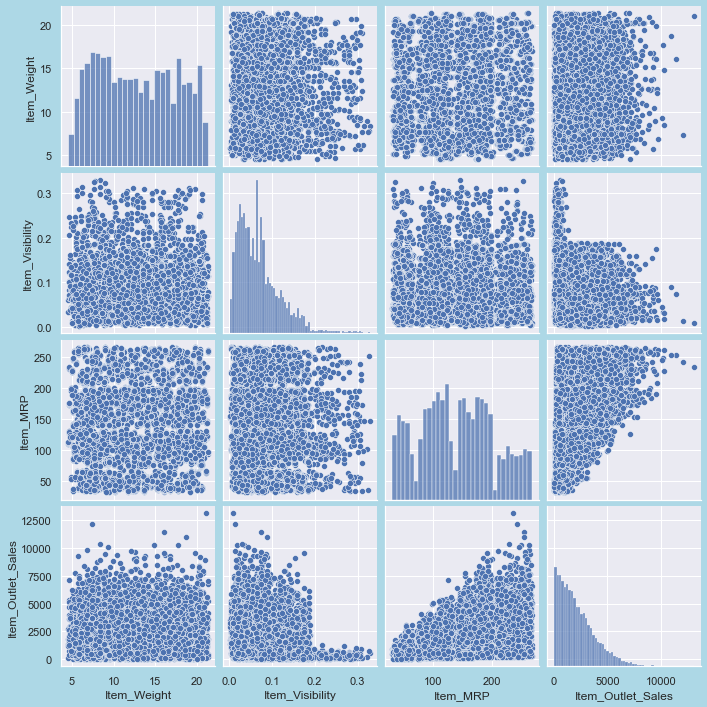

In [552]:
sns.pairplot(S_df)

### <div class="alert alert-info">Interpretation
- **From the above pair plot we can see how the numerical columns are related to each other and we can see that the sales has some kind of positive realation wrt item_MPR**</div>

In [553]:
S_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [554]:
c = S_df.select_dtypes(exclude = object)
d = S_df.select_dtypes(include = object)

In [555]:
from impyute.imputation.cs import mice
a = mice(c.values)

In [556]:
s = pd.DataFrame(a)
s.columns = c.columns

In [557]:
S_df['Item_Outlet_Sales'] = s['Item_Outlet_Sales']

In [558]:
S_df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

### <div class="alert alert-info">Interpretation
- **The missing value treatment is done by using MICE tecchique which is Multiple Imputation by Chained Equations, here the multiple times the values is going imputed through predictions and which ever shows less variance is repalced wiht Nan**</div>

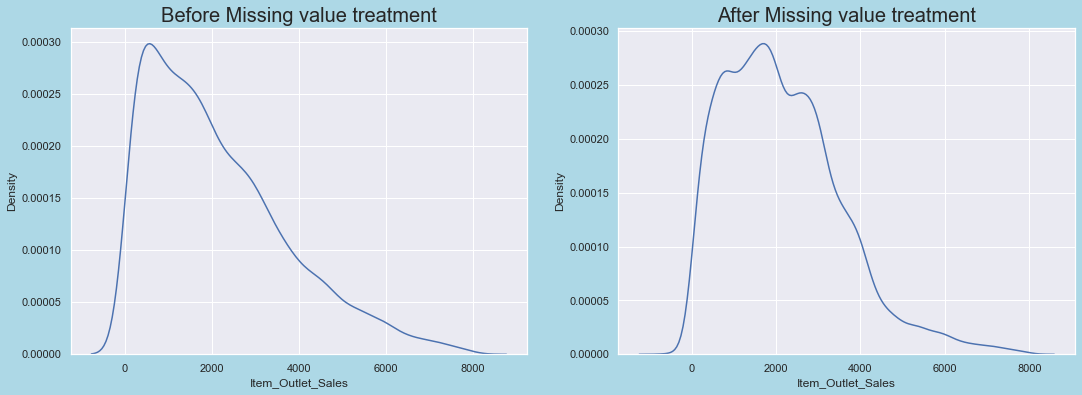

In [572]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df[df.Item_Outlet_Sales<=8000]['Item_Outlet_Sales'], palette = 'bright')
plt.title('Before Missing value treatment', fontsize = 20)

plt.subplot(1, 2, 2)
sns.kdeplot(s[s.Item_Outlet_Sales<=8000]['Item_Outlet_Sales'], palette = 'bright')
plt.title('After Missing value treatment', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above density plot we can see that the distribution of data before and after missing value treatment**
- **The plot we can see it has high variance because the datapoints are deviated more from the mean**
- **Even though the graphs looks right skeweed but it is approximatly normally distributed based on that we can say less bias**</div>

In [560]:
c.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

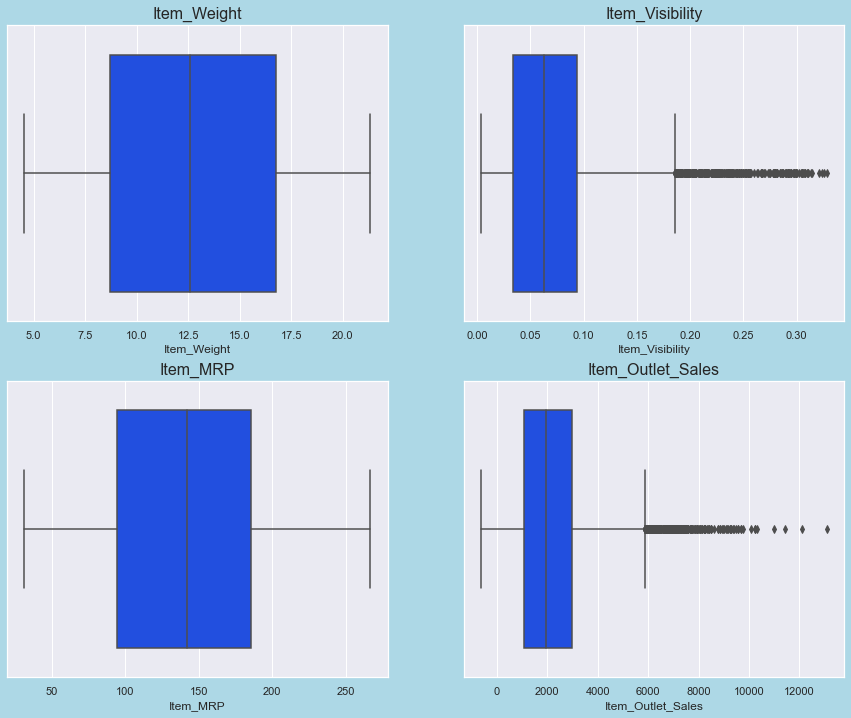

In [570]:
t = 1
plt.figure(figsize = (15, 12))
for i in c.columns:
    plt.subplot(2, 2, t)
    sns.boxplot(S_df[i], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
**- From the above box plot we can see outliers are present in sales and visibility here we need to select the algorithm which can handles the outlier accurately**</div>

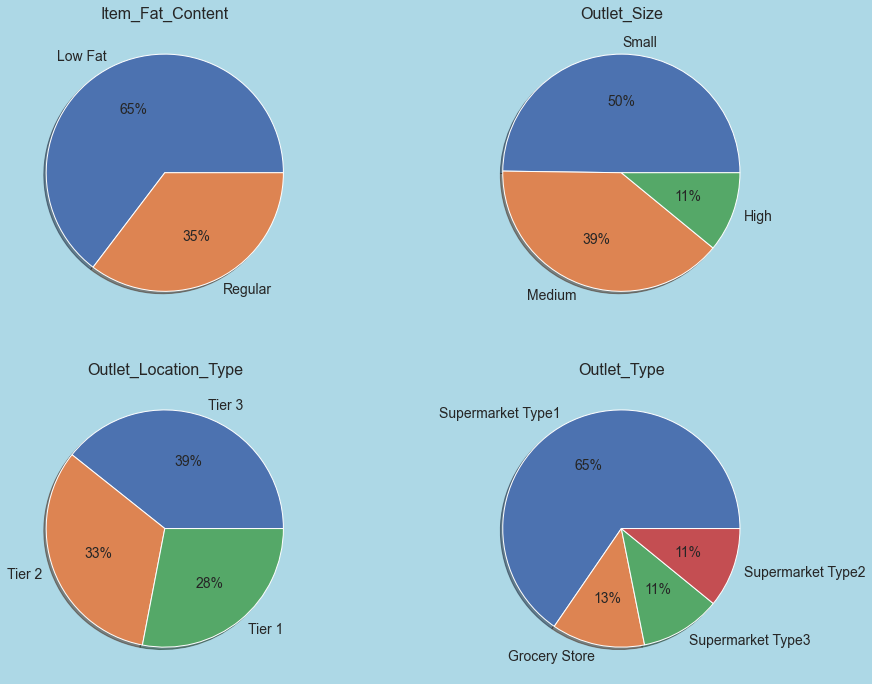

In [562]:
t = 1
plt.figure(figsize = (15, 12))
for i in d.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type'], axis = 1):
    plt.subplot(2, 2, t)
    plt.pie(S_df[i].value_counts(), labels = S_df[i].value_counts().index, autopct = '%.0f%%', shadow = True, textprops={'fontsize': 14})
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
- **From the above vizualization we can see that low fat products sales are more**
- **Small size outlets are more in proportion interms of number of sales**
- **Tier 3 locations have high in proportion where the number of product sales more in this type locations**
- **Supermarket type 1 is more in proportion where the number of product sales is more**

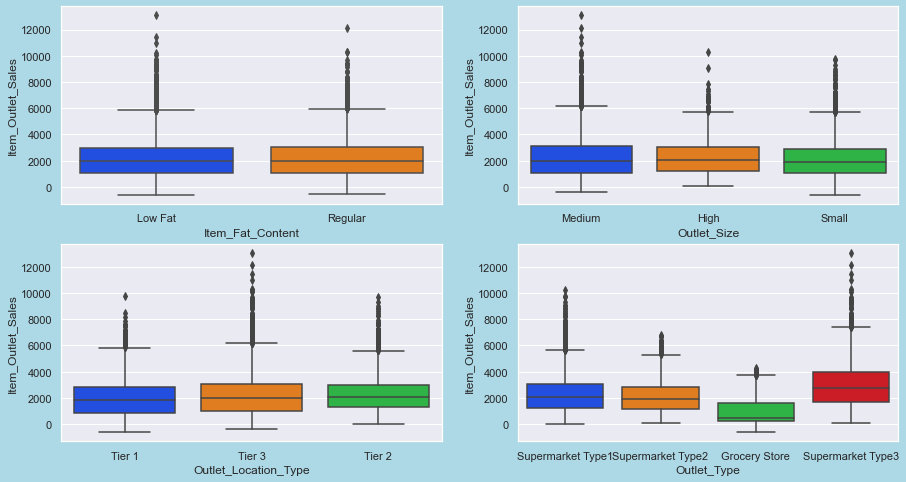

In [569]:
t = 1
plt.figure(figsize=(15, 8))
for i in d.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type'], axis = 1):
    plt.subplot(2, 2, t)
    sns.boxplot(x = S_df[i], y = S_df['Item_Outlet_Sales'], palette = 'bright')
    t = t + 1

### <div class="alert alert-info">Interpretation
- **Above box plot is distribution of average sales wrt to categorical columns and sales**
- **item_fat_content, outlet_size and outlet_location_type all are evenly distirbuted** 
- **In ourtlet_type the supermarket type 3 shows highest average sales compared to all other outlet types**

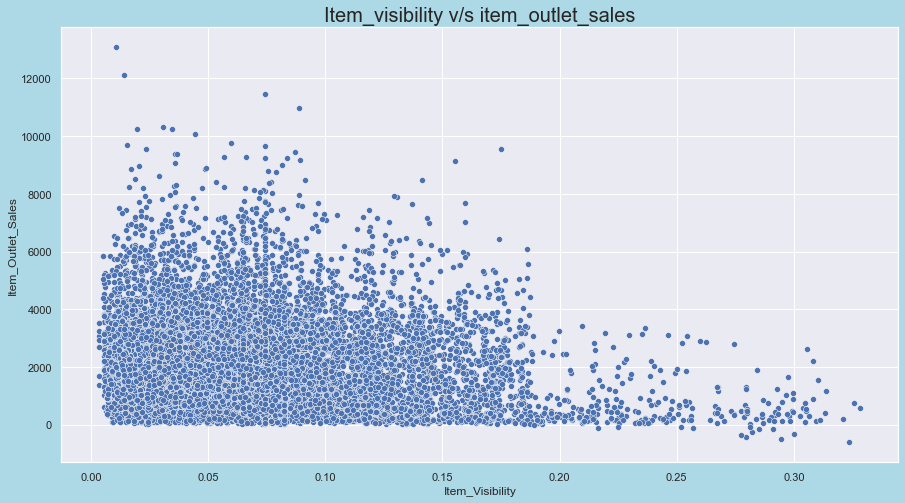

In [573]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = S_df['Item_Visibility'], y = S_df['Item_Outlet_Sales'], palette = 'bright')
plt.title('Item_visibility v/s item_outlet_sales', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above plot we can see where ever the visibility is less the sales of those products are more**

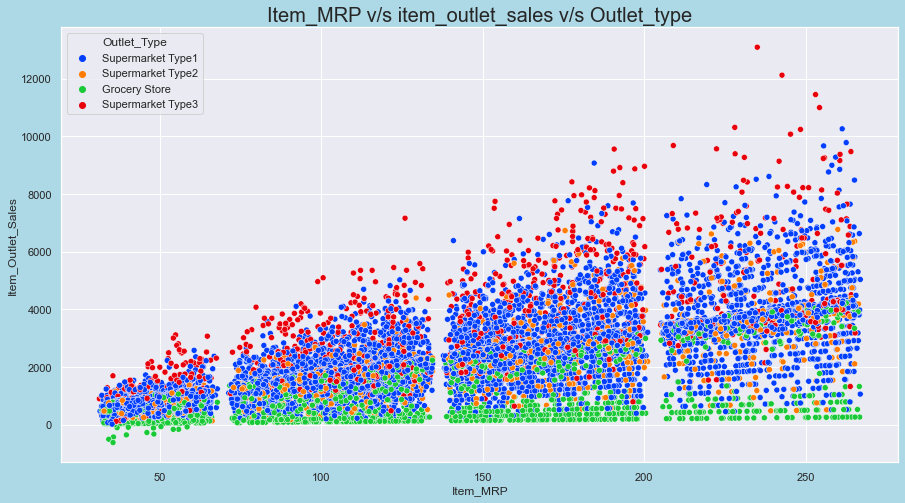

In [575]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = S_df['Item_MRP'], y = S_df['Item_Outlet_Sales'], hue =S_df['Outlet_Type'], palette = 'bright' )
plt.title('Item_MRP v/s item_outlet_sales v/s Outlet_type', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above vizualizaiton we can see that the MRP is more in grocery and sales is less**
- **The MRP is less in supermarket type 3 and also the sales is more in that outliet type** 

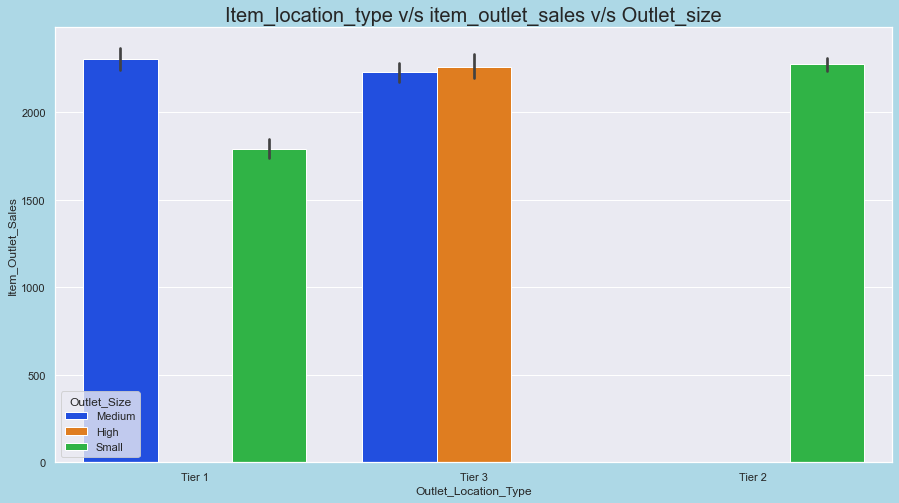

In [578]:
plt.figure(figsize=(15, 8))
sns.barplot(x = S_df['Outlet_Location_Type'], y = S_df['Item_Outlet_Sales'], hue =S_df['Outlet_Size'], palette = 'bright' )
plt.title('Item_location_type v/s item_outlet_sales v/s Outlet_size', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above vizualizaiton we can see tyre 3 location is showing more sales**
- **In tyre 3 location where ever hte high outlet size is there the sales are more** 

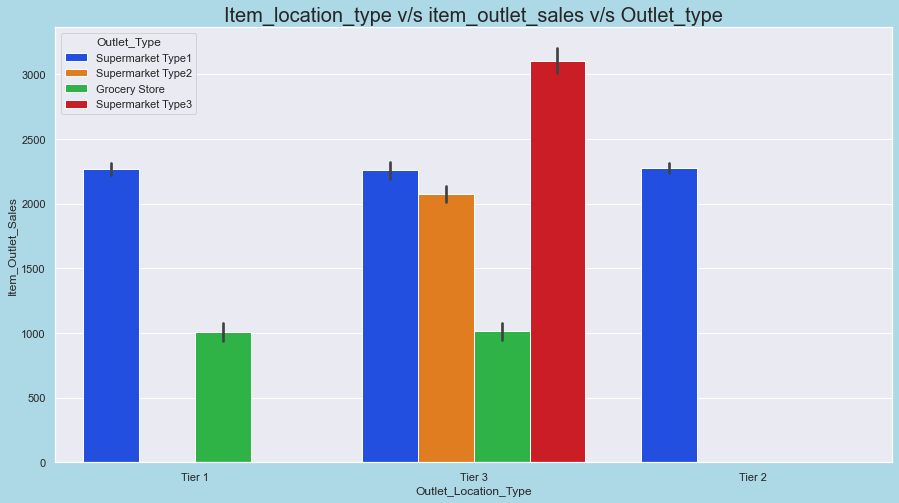

In [579]:
plt.figure(figsize=(15, 8))
sns.barplot(x = S_df['Outlet_Location_Type'], y = S_df['Item_Outlet_Sales'], hue =S_df['Outlet_Type'], palette = 'bright' )
plt.title('Item_location_type v/s item_outlet_sales v/s Outlet_type', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **In the type 3 locaton the supermarket type 3 is showing highest sales compared to all other outlet type**

<AxesSubplot:>

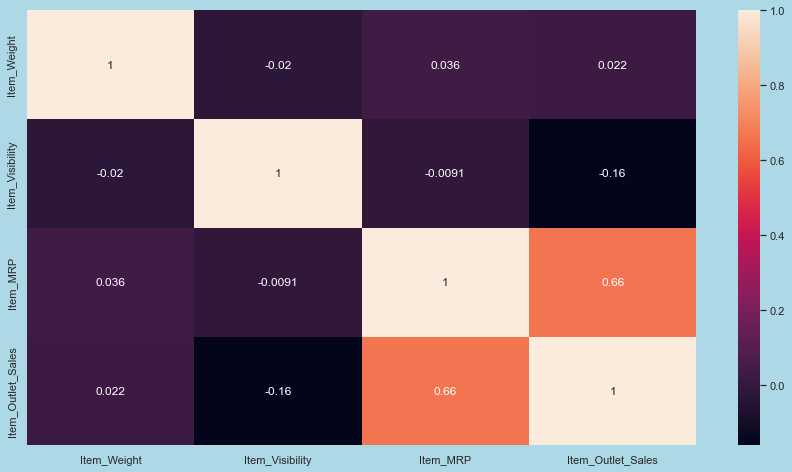

In [566]:
plt.figure(figsize=(15,8))
sns.heatmap(S_df.corr(), annot = True)

### <div class="alert alert-info">Interpretation
- **Form the heatmat we can see that the item_MRP is having good correlation with item outlet sales**
- **We can also see that all other columns shows less correlation between each other**

## &#10148;  Data Preprocessing

### &#10148;  Feature Engineering
#### &#10148;  Feature Transformation

In [507]:
for i in d.columns:
    S_df[i] = S_df[i].astype('category')

In [508]:
S_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Identifier       14204 non-null  category
 1   Item_Weight           14204 non-null  float64 
 2   Item_Fat_Content      14204 non-null  category
 3   Item_Visibility       14204 non-null  float64 
 4   Item_Type             14204 non-null  category
 5   Item_MRP              14204 non-null  float64 
 6   Outlet_Identifier     14204 non-null  category
 7   Outlet_Size           14204 non-null  category
 8   Outlet_Location_Type  14204 non-null  category
 9   Outlet_Type           14204 non-null  category
 10  Item_Outlet_Sales     14204 non-null  float64 
dtypes: category(7), float64(4)
memory usage: 601.1 KB


In [509]:
for i in d.columns:
    S_df[i] = LabelEncoder().fit_transform(S_df[i])

In [510]:
S_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,0,2,1,994.7052


### <div class="alert alert-info">Interpretation
- **Uing the label encoder all the categorical columns is converted into numerical columns**
- **Here transform of all the columns to numerical is requried because the the categorical columns cannot handel by algorithms**

#### &#10148;  Feature Scalling

In [511]:
for i in S_df.drop(['Item_Outlet_Sales'], axis = 1).columns:
    S_df[i] = StandardScaler().fit_transform(np.array(S_df[i]).reshape(-1, 1))

In [512]:
S_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388320,-0.751014,-0.739212,-1.115880,-0.766467,1.752511,1.507764,-0.575144,-1.369286,-0.252702,3735.1380
1,-1.717498,-1.477653,1.352792,-1.049426,1.606957,-1.493696,-0.607145,-0.575144,1.091566,1.002766,443.4228
2,-0.262885,1.011839,-0.739212,-1.101219,0.657587,0.009874,1.507764,-0.575144,-1.369286,-0.252702,2097.2700
3,0.758014,1.377308,1.352792,0.084363,-0.291782,0.661838,-1.664600,-0.575144,1.091566,-1.508171,732.3800
4,1.149470,-0.830557,-0.739212,-0.123442,0.420245,-1.403623,-1.312115,-2.055636,1.091566,-0.252702,994.7052


### <div class="alert alert-info">Interpretation
- **Scaling is done through standardization because there are outliers present in the features and the standardization is good with handling the ourliers**

#### &#10148;  Spliting the data to test and train

In [513]:
X = S_df.drop(['Item_Outlet_Sales'], axis = 1).values
Y = S_df['Item_Outlet_Sales'].values
kf = KFold(n_splits=5, shuffle=True, random_state=None)
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

## &#10148;  Build, Predict and evaluate the model

### <div class="alert alert-info">Observations of EDA
- **The dependent column is contineous**
- **The outliers are present in the independent features as well as dependent feature**
- **The bias is less and varience is more**

### <div class="alert alert-info">Selection of algorithms
- **Based on the EDA observations we need to select regressor algorithm where the dependent feature is contineous**
- **As the ourliers are present in the features the algorithm should handle the outliers in more efficient way**
- **The variance is more so we need to select the algorithm which lower the variance**

#### &#10148;  Linear Regression

In [514]:
# Model building
model1 = LinearRegression().fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

In [515]:
# Performance
Train_1 = model1.score(X_train, Y_train)
Test_1 = model1.score(X_test, Y_test)
print('Train_performance: ', round(Train_1, 2), 'Test_performance: ', round(Test_1, 2))

Train_performance:  0.54 Test_performance:  0.53


In [516]:
# Error terms
mse1 = mean_squared_error(Y_test, Y_pred1)
rmse1 = np.sqrt(mean_squared_error(Y_test, Y_pred1))
print('MSE: ', round(mse1, 2), 'RMSE: ', round(rmse1, 2))

MSE:  998189.17 RMSE:  999.09


#### &#10148;  DecisionTreeRegressor

In [517]:
# Model building
model2 = DecisionTreeRegressor(max_depth = 3).fit(X_train, Y_train)
Y_pred2 = model1.predict(X_test)

In [518]:
# Performance
Train_2 = model2.score(X_train, Y_train)
Test_2 = model2.score(X_test, Y_test)
print('Train_performance: ', round(Train_2, 2), 'Test_performance: ', round(Test_2, 2))

Train_performance:  0.52 Test_performance:  0.51


In [519]:
# Error terms
mse2 = mean_squared_error(Y_test, Y_pred2)
rmse2 = np.sqrt(mean_squared_error(Y_test, Y_pred2))
print('MSE: ', round(mse2, 2), 'RMSE: ', round(rmse2, 2))

MSE:  998189.17 RMSE:  999.09


#### &#10148;  RandomForestRegressor

In [520]:
# Model building
sample = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=20, n_estimators=200, oob_score=True).fit(X_train, Y_train)

In [521]:
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100, 200], 'n_estimators': [10,25,30,50,100]}

In [522]:
# Hyperparameter tuning
grid_search = GridSearchCV(estimator=sample, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="neg_mean_squared_error")
grid_search.fit(X_train, Y_train)
rf_best = grid_search.best_estimator_
rf_best

Fitting 4 folds for each of 150 candidates, totalling 600 fits


RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_jobs=-1,
                      oob_score=True, random_state=42)

In [523]:
# Model building
model3 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=50, n_estimators=180, oob_score=True, min_samples_leaf = 50).fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)

In [524]:
# Performance
Train_3 = model3.score(X_train, Y_train)
Test_3 = model3.score(X_test, Y_test)
print('Train_performance: ', round(Train_3, 2), 'Test_performance: ', round(Test_3, 2))

Train_performance:  0.61 Test_performance:  0.58


In [525]:
# Error terms
mse3 = mean_squared_error(Y_test, Y_pred3)
rmse3 = np.sqrt(mean_squared_error(Y_test, Y_pred3))
print('MSE: ', round(mse3, 2), 'RMSE: ', round(rmse3, 2))

MSE:  906770.89 RMSE:  952.25


In [477]:
from IPython.display import display
T = pd.DataFrame({"Algorithms":['Linear Regression','Decission Tree Regression', 'Random Forest Regressor'], 
                  "Train":[round(Train_1, 2), round(Train_2, 2), round(Train_3, 2)], "Test":[round(Test_1, 2), round(Test_2, 2), round(Test_3, 2)], 
                  "MSE":[round(mse1, 2), round(mse2, 2), round(mse3, 2)], 
                  "RMSE":[round(rmse1, 2), round(rmse2, 2), round(rmse3, 2)]
                  })
display(T)

,Algorithms,Train,Test,MSE,RMSE
0,Linear Regression,0.54,0.54,975617.63,987.73
1,Decission Tree Regression,0.52,0.53,975617.63,987.73
2,Random Forest Regressor,0.61,0.59,864243.28,929.65


### <div class="alert alert-info">Interpretation
- **From the above table we can see that the random forest is showing better performace for train aswell as test and the errors are less compare to other models**

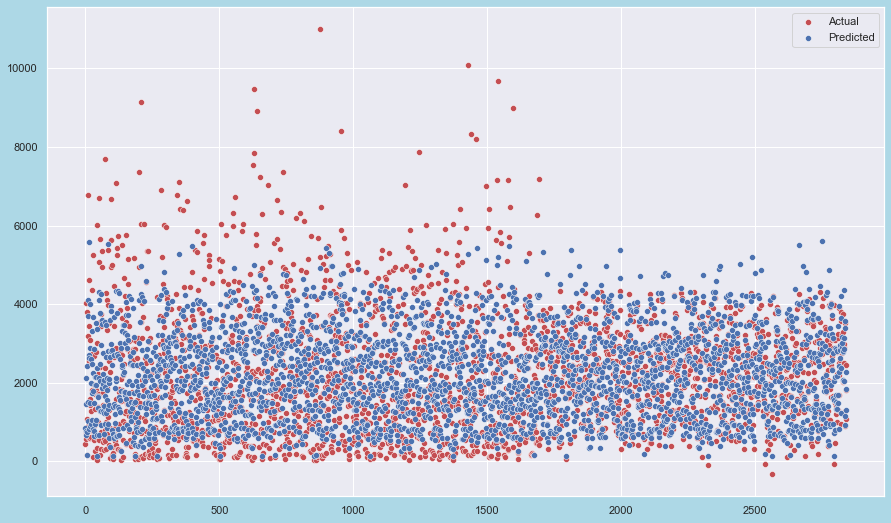

In [582]:
plt.figure(figsize = (15, 9))
u = list(np.arange(0, len(Y_pred3)))
sns.scatterplot(x = u, y = Y_test, ci = None, color = 'r')
sns.scatterplot(x = u, y = Y_pred3, ci = None, color = 'b')
plt.legend(['Actual', 'Predicted'])
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above visualization we can see how the datapoints between actual and prediction and also the error is more but the model is good for prediction but not highly accurate**

### <div class="alert alert-info">Conclusion
- **The Low fat products should be available in the stock**
- **The visibility of the product should be less**
- **More sales are in the location type of tier 3**
- **More sales are in the high outlet size**
- **More sales are in the supermarket type 3 outlet type**
- **The randomforestregressor is giving good perfomance withour overfitting and underfitting**
- **The predictions are good but not highly accuarate**